In [2]:
import numpy as np 
import pandas as pd
from collections import defaultdict
import numpy as np 
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split


In [3]:
assert pd.__version__ == '1.3.0', "Pandas version needs to be updated to 1.3.0"

In [3]:
# data = open('./data.csv', mode='w')
# row = list()
# files=['combined_data_1.txt','combined_data_2.txt', 
#        'combined_data_3.txt', 'combined_data_4.txt']
# for file in files:
#     with open(file) as f:
#         for line in f: 
#             line = line.strip()
#             if line.endswith(':'):
#                 movie_id = line.replace(':', '')
#             else:
#                 row = [x for x in line.split(',')]
#                 row.insert(0, movie_id)
#                 data.write(','.join(row))
#                 data.write('\n')
# data.close()

In [4]:
# ratings = pd.read_csv('data.csv', sep=',', 
#                        names=['movieId', 'userId','rating','date'])
# ratings.date = pd.to_datetime(ratings.date)
# ratings.sort_values(by='date', inplace=True)

In [5]:
# ratings = ratings[['movieId','userId','rating']]
# ratings.head()

In [6]:
# user_ids = []
# for i in range(ratings.shape[0]):
#     if i % 100000 == 0:
#         print(i)
#     ratings['userId'][i] = 'u'+ str(ratings['userId'][i])

In [7]:
# ratings['movieId'] = movie_ids
# ratings['userId'] = user_ids

# ratings.to_csv('./data_processed.csv', index=False)

In [8]:
# ratings = pd.read_csv('./data_processed.csv', sep=',',  header=0)
# ratings.head()

In [9]:
# title_df = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['movie', 'year', 'title'])
# title_df.rename(columns={'movie':'movieId'}, inplace=True)
# title_df.head(10)

In [10]:
# ratings_df = ratings.merge(title_df, left_on='movieId', right_on='movieId')

In [11]:
# with open('rating_df.pkl', 'wb') as handle:
#     pickle.dump(ratings_df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
# Load data (deserialize)
with open('rating_df.pkl', 'rb') as handle:
    ratings_df = pickle.load(handle)


In [34]:
ratings_df.head()

,movieId,userId,rating,year,title
0,1,u1488844,3,2003.0,Dinosaur Planet
1,1,u822109,5,2003.0,Dinosaur Planet
2,1,u885013,4,2003.0,Dinosaur Planet
3,1,u30878,4,2003.0,Dinosaur Planet
4,1,u823519,3,2003.0,Dinosaur Planet


In [35]:
ratings_df.tail()

,movieId,userId,rating,year,title
100480502,17770,u1790158,4,2003.0,Alien Hunter
100480503,17770,u1608708,3,2003.0,Alien Hunter
100480504,17770,u234275,1,2003.0,Alien Hunter
100480505,17770,u255278,4,2003.0,Alien Hunter
100480506,17770,u453585,2,2003.0,Alien Hunter


In [5]:
rating_freq_df = ratings_df[['userId','rating']].groupby(by=['userId'],as_index=False).count()

In [9]:
movie_rating_freq_df = ratings_df[['movieId','rating']].groupby(by=['movieId'],as_index=False).count()

In [28]:
rating_freq_df = ratings_df[['movieId','rating']].groupby(by=['rating'],as_index=False).count()

Text(0.5, 1.0, '# of review count for each rating')

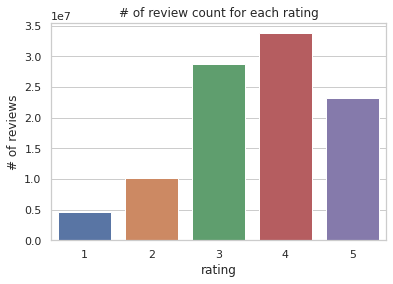

In [33]:
sns.set_theme(style="whitegrid")
sns.barplot(x="rating", y="movieId", data=rating_freq_df)
plt.ylabel('# of reviews')
plt.title('# of review count for each rating')

Text(0.5, 1.0, 'Histogram of # of ratings by all users')

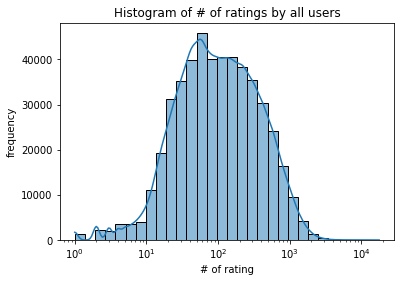

In [8]:
sns.histplot(data=rating_freq_df, x='rating',kde=True, log_scale=True, bins=30)
plt.xlabel('# of rating')
plt.ylabel('frequency')
plt.title('Histogram of # of ratings by all users')

Text(0.5, 1.0, 'Histogram of # of ratings of all movies')

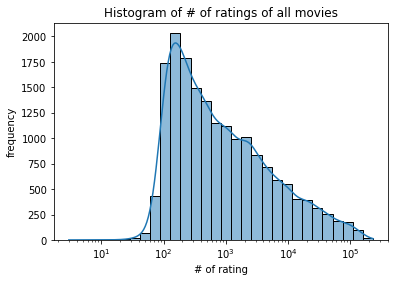

In [11]:
sns.histplot(data=movie_rating_freq_df, x='rating',kde=True, log_scale=True, bins=30)
plt.xlabel('# of rating')
plt.ylabel('frequency')
plt.title('Histogram of # of ratings of all movies')

In [27]:
a = sorted(rating_freq_df['rating'], reverse=True)
b = a[:round((rating_freq_df.shape[0])*0.1)]
sorted(b)

[541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 541,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542,
 542

In [ ]:
data['movieId'].unqiue()

### outliers removal

<AxesSubplot:xlabel='rate_freq', ylabel='Count'>

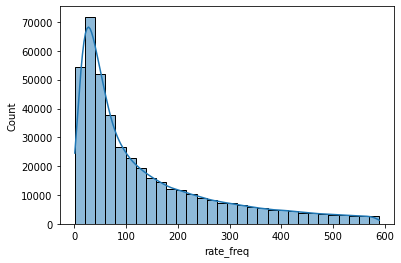

In [12]:
q1 = np.percentile(rating_freq_df['rating'],25)
q3 = np.percentile(rating_freq_df['rating'],75)
median = np.percentile(rating_freq_df['rating'],50)
low = q1-1.5*(q3-q1)
high = q3+1.5*(q3-q1)

removed_hist = [rating_freq_df['rating'][i] for i in range(rating_freq_df.shape[0]) if rating_freq_df['rating'][i] <= high]
temp_df = pd.DataFrame(removed_hist, columns=['rate_freq'])
sns.histplot(data=temp_df, x='rate_freq',kde=True,bins=30)

In [7]:
ratings_df.head()

,movieId,userId,rating,year,title
0,1,u1488844,3,2003.0,Dinosaur Planet
1,1,u822109,5,2003.0,Dinosaur Planet
2,1,u885013,4,2003.0,Dinosaur Planet
3,1,u30878,4,2003.0,Dinosaur Planet
4,1,u823519,3,2003.0,Dinosaur Planet


In [36]:
top10_user = np.percentile(rating_freq_df['rating'],90)
top10_movie = np.percentile(movie_rating_freq_df['rating'],90)
top10_movie

12303.800000000021

In [38]:
movie_rating_freq_df.head()

,movieId,rating
0,1,547
1,2,145
2,3,2012
3,4,142
4,5,1140


In [8]:
non_zero_cnt = ratings_df.shape[0]
total_elements_cnt = len(ratings_df['userId'].unique())*len(ratings_df['movieId'].unique())

# calculate matrix sparsity
sparsity = (1 - (non_zero_cnt/total_elements_cnt))*100
sparsity

98.8224423375933

In [9]:
ratings_df.dtypes

movieId      int64
userId      object
rating       int64
year       float64
title       object
dtype: object

In [159]:
# randomly select .1% of the data
ratings_df_sample = ratings_df.sample(frac=0.01,ignore_index=True)
train, test = train_test_split(ratings_df_sample, test_size=0.2, random_state=42, shuffle=True)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
print(ratings_df_sample.shape)
ratings_df_sample.head()
train.head()

(1004805, 5)


,movieId,userId,rating,year,title
0,15007,u1057513,3,1980.0,Any Which Way You Can
1,6972,u450009,5,1998.0,Armageddon
2,6205,u2132649,3,1983.0,Scarface: 20th Anniversary Edition
3,10165,u1517061,3,2000.0,Supernova
4,12508,u1761836,4,1968.0,Chitty Chitty Bang Bang


In [160]:
train.shape

(803844, 5)

In [161]:
assert None not in set(ratings_df['rating'].unique()), 'There are some rows without a rating'
assert 0 not in set(ratings_df['rating'].unique()), 'There are some rows with a rating being 0'
assert ratings_df['title'].isna().any()==False, 'There are nan values in the movie title column'

In [162]:
# key: each movie; item: a set of user ids
moviesPerUser = defaultdict(set)
# key: each user; item: a set of movie ids
usersPerMovie = defaultdict(set)
# key: each movie id; item: corresponding movie title
movieTitles = {}
# key: a tuple of user and movie; item: corresponding rating 
movieRatings = {}

In [163]:
uniqueUsers = list(ratings_df_sample['userId'].unique())
uniqueMovies = list(ratings_df_sample['movieId'].unique())
len(uniqueUsers), len(uniqueMovies)

(290613, 16313)

In [164]:
for i in range(ratings_df_sample.shape[0]):
    movie = ratings_df_sample['movieId'][i]
    user = ratings_df_sample['userId'][i]
    moviesPerUser[user].add(movie)
    usersPerMovie[movie].add(user)
    movieTitles[movie] = ratings_df_sample['title'][i]
    movieRatings[user,movie] = ratings_df_sample['rating'][i]

In [165]:
all_movies = set(ratings_df_sample['movieId'].unique())
all_users = set(ratings_df_sample['userId'].unique())

# get index by movie id
movie_index = dict(zip(list(all_movies),list(range(len(all_movies)))))
# get index by user id 
user_index = dict(zip(list(all_users),list(range(len(all_users)))))
# get movie id by index
index_movie = dict(zip(list(range(len(all_movies))),list(all_movies)))
# get user id by index
index_user = dict(zip(list(range(len(all_users))),list(all_users)))

assert len(movie_index.keys()) == len(uniqueMovies), 'Check the length of movie_index vs. uniqueMovies'
assert len(user_index.keys()) == len(uniqueUsers), 'Check the length of user_index vs. uniqueUsers'


In [166]:
from scipy.sparse import coo_matrix

row, col, data = [],[],[]

# get unique movies from the chosen train dataframe
for m in train['movieId'].unique():
    # only get unique users that are in the chosen train dataframe
    users_df = train[train['movieId'] == m]
    users = users_df['userId'].unique()
    i = movie_index[m]
    for u in users:
        row.append(i)
        j = user_index[u]
        col.append(j)
        data.append(movieRatings[u,m])

assert len(row) == len(col) == len(data), 'length is not equal'

In [167]:
matrix = coo_matrix((data, (row, col)), shape=(len(movie_index),len(user_index)), dtype=np.int8).toarray()

In [168]:
matrix.shape

(16313, 290613)

In [169]:
import pandas as pd 
import numpy as np 
from scipy.sparse import csc_matrix
import pickle
import time
import os
import random
from multiprocess import Manager, Process, Queue, Lock

# The consumer function takes data off of the Queue
def consumer(tasks, print_lock, task_lock, matrix, rating_avg, max_row):
    # Synchronize access to the console
    # with print_lock:
    #     print('Starting consumer => {}'.format(os.getpid()))
     
    # Run indefinitely
    while True:
        task = None

        with task_lock:
            try:
                task = tasks.pop()
            except:
                return
        print(task*10000)
        # do task
        for a in range(10000):
            i = task*10000+a
            if i > max_row:
                break
            rating_sum = sum(matrix[:,i])
            user = index_user[i]
            movies = moviesPerUser[user]
            rating_avg[i] = rating_sum/len(movies)
            

In [170]:
# Create a lock object to synchronize resource access
print_lock = Lock()
task_lock = Lock()

consumers = []

NUM_THREADS = 32

manager = Manager()
tasks = manager.list()
rating_avg = manager.dict()

max_row = len(user_index)-1
index = list(range((ratings_df_sample.shape[0]//10000)+1))
tasks.extend(index)
# print(len(tasks))


# Create consumer processes
for i in range(NUM_THREADS):
    p = Process(target=consumer, args=(tasks, print_lock, task_lock, matrix, rating_avg, max_row))
        
    p.daemon = False
    consumers.append(p)
print('launching threads')
for c in consumers:
    c.start()

for idx, c in enumerate(consumers):
    c.join()
    print(f'cleared process {idx}')

print('Parent process exiting...')



launching threads
1000000
980000990000

970000950000960000


930000940000920000

910000

900000880000890000870000


860000
850000840000

830000
820000810000800000

780000790000770000



760000
750000740000730000720000
710000700000
690000




680000
670000660000650000640000630000620000610000


600000



590000

580000570000550000560000540000530000520000
510000
500000







490000470000480000460000450000440000430000420000410000
400000
390000





380000


360000370000350000340000330000

320000310000


300000280000
290000270000
260000250000
240000
220000230000

210000

200000
190000

180000
170000
160000




150000
140000
130000
120000
110000
100000
90000
80000
70000
60000
50000
40000
30000
20000
100000

cleared process 0
cleared process 1
cleared process 2
cleared process 3
cleared process 4
cleared process 5
cleared process 6
cleared process 7
cleared process 8
cleared process 9
cleared process 10
cleared process 11
cleared process 12
cleared process 13
cleared process 14
cleared proce

In [171]:
len(rating_avg)

290613

In [73]:
# rating_avg = {}
# for i in range(len(user_index)):
#     rating_sum = sum(matrix[:,i])
#     user = index_user[i]
#     movies = moviesPerUser[user]
#     rating_avg[i] = rating_sum/len(movies)


In [172]:
import random
# get a random user a
random_user_a = random.choice(list(moviesPerUser.keys()))

# get a random user b
random_user_b = random.choice(list(moviesPerUser.keys()))
random_user_a, random_user_b

('u1149181', 'u1467436')

In [173]:
user_a_index = user_index[random_user_a]
user_b_index = user_index[random_user_b]

vector_a = np.zeros(len(matrix[:,user_a_index]))
vector_b = np.zeros(len(matrix[:,user_b_index]))
for i in range(len(matrix[:,user_a_index])):
    if matrix[:,user_a_index][i] > 0:
        vector_a[i] = matrix[:,user_a_index][i]-rating_avg[user_a_index]
    if matrix[:,user_b_index][i] > 0:
        vector_b[i] = matrix[:,user_b_index][i]-rating_avg[user_b_index]

assert len(vector_b) == len(vector_a)

In [174]:
def cal_cosine_similarity(vector_a,vector_b):
    vector_a = np.array([vector_a])
    vector_b = np.array([vector_b])
    return float(cosine_similarity(vector_a, vector_b))

In [175]:
cal_cosine_similarity(vector_a, vector_b)

0.0

In [176]:
ratingMean = sum(d for d in train['rating']) / train.shape[0]
ratingMean

3.6053338707510414

In [177]:
def prediction(chosen_user, chosen_movie, matrix):

    user_a_index = user_index[chosen_user]
    vector_a = np.zeros(len(matrix[:,user_a_index]))

    cosine_similarity_list = []

    for user in usersPerMovie[chosen_movie]:
        if user_index[chosen_user] != user_index[user]:
            user_b_index = user_index[user]
            vector_b = np.zeros(len(matrix[:,user_b_index]))
            for i in range(len(matrix[:,user_a_index])):
                if matrix[:,user_a_index][i] > 0:
                    vector_a[i] = matrix[:,user_a_index][i]-rating_avg[user_a_index]
                if matrix[:,user_b_index][i] > 0:
                    vector_b[i] = matrix[:,user_b_index][i]-rating_avg[user_b_index]
            if cal_cosine_similarity(vector_a,vector_b) > 0: 
                cosine_similarity_list.append((cal_cosine_similarity(vector_a,vector_b),user))
    similarity_sort = sorted(cosine_similarity_list,reverse=True)
    if len(similarity_sort) >= 10:
        similarity_sort = similarity_sort[:10]
    elif 0 < len(similarity_sort) < 10:
        similarity_sort = similarity_sort[:len(similarity_sort)]
    print(similarity_sort)
    if len(similarity_sort) == 0:
        predicted_rating = ratingMean
    else:
        sort_d = {}
        for e in similarity_sort:
            sort_d[e[1]] = e[0]
        # calcualte weighted rating
        nom = 0
        for u in sort_d:
            nom += movieRatings[u,chosen_movie]*sort_d[u]
        predicted_rating = nom/sum(sort_d.values())

    return predicted_rating
            
                    

In [183]:
chosen_user = random.choice(list(moviesPerUser.keys()))
chosen_movie = random.choice(list(moviesPerUser[chosen_user]))

print(prediction(chosen_user,chosen_movie, matrix), movieRatings[chosen_user,chosen_movie])

[(0.6674912392349772, 'u2547841'), (0.09950371902099885, 'u1897101'), (0.09950371902099885, 'u1813120'), (0.09950371902099885, 'u1697933'), (0.09950371902099885, 'u1495746'), (0.09950371902099885, 'u1225003'), (0.09484756663411144, 'u167111'), (0.0889988318979969, 'u1471225'), (0.08546432862766984, 'u416384'), (0.08477844894315521, 'u356225')]
4.364095171113086 3


In [184]:
test.shape

(200961, 5)

In [185]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

predictions = [prediction(test['userId'].iloc[i], test['movieId'].iloc[i],matrix) for i in range(test.shape[0])]
print(MSE(predictions, test['rating'].tolist()))

[]
[]
[(0.23573273566458308, 'u921585'), (0.17197206437655044, 'u1704892'), (0.07848649076044448, 'u106260')]


KeyboardInterrupt: 

In [33]:
len(usersPerMovie[chosen_movie])

1432

In [131]:
# initialize the matrix size with all zeros
matrix = np.zeros((len(uniqueMovies),len(uniqueUsers)))
matrix.shape

(9313, 77481)

In [ ]:
for m in usersPerMovie:
    users = usersPerMovie[m]
    for u in users:
        i = movie_index[m]
        j = user_index[u]
        matrix[i][j] = movieRatings[u,m]

In [ ]:
title = movieTitles[index_movie[0]]
ratings_df_sample[ratings_df_sample['title']==title]

In [ ]:
import sklearn 
from sklearn.metrics.pairwise import cosine_similarity

def cal_cosine_similarity(product_x,product_y,matrix):
    # get index of product x
    i = movie_index[product_x]
    # get index of product y
    j = movie_index[product_y]
    # find the corresponding rows in the matrix
    x = np.array([matrix[i]])
    y = np.array([matrix[j]])
    return float(cosine_similarity(x,y))

In [89]:
import random
# get a random product
random_movie_a = random.choice(list(usersPerMovie.keys()))
random_movie_a

6727

In [90]:
random_movie_b = random.choice(list(usersPerMovie.keys()))
random_movie_b

669

In [91]:
cal_cosine_similarity(random_movie_a,random_movie_b,matrix)

0.0

In [ ]:
def process_result(movie,matrix):
    movie_x = movie
    similar_movies = set()
    for k in range(len(matrix)):
        movie_y = index_movie[k]
        if movie_x == movie_y:
            continue
        else:
            similar_movies.add((cal_cosine_similarity(movie_x,movie_y,matrix),movie_y))
    # sort the similarity in descending order
    similar_movies = sorted(similar_movies,reverse=True)
    non_zeros = []
    for i in similar_movies:
        if i[0] > 0:
            non_zeros.append(i)
    # if there are more than 5 similar items, get the top 5
    if len(non_zeros) >= 5:
        result = similar_movies[:5]
    # if there are less than 5 similar items, get all of them
    elif 0 < len(non_zeros) < 5:
        result = similar_movies[:len(non_zeros)]
    # if there is no similar item, return 'None'
    else:
        result = 'None'
    return result

In [ ]:
random_movie = random.choice(list(usersPerMovie.keys()))

In [ ]:

result = process_result(random_movie,matrix)
result

In [ ]:
# get selected movie name
selected_movie = movieTitles[random_movie]

# get similar movie names
movies = []
for x in result:
    if x != 'None' and x[1] in movieTitles:
        movies.append(movieTitles[x[1]])
selected_movie, movies             

In [ ]:
ratingMean = sum(d for d in ratings_df_sample['rating']) / ratings_df_sample.shape[0]
ratingMean

In [ ]:
def predictRatingCosine(user,movie):
    # obtain all movies that the user reviewed
    compare_movies = moviesPerUser[user]
    similarity_sort = set()
    for p in compare_movies:
        if p == movie: # skip if it is the same movie as the predicting movie 
            continue
        else:
            # calculate similarity between other reviewed movies and the predicting movie
            similarity = cal_cosine_similarity(movie,p,matrix)
            # if the similarity score is greater than 0 then store it in a set
            if similarity > 0:
                similarity_sort.add((similarity,p))
    # sort all the similarity scores in descending order
    similarity_sort = sorted(similarity_sort,reverse=True)
    # get the top 5 if there are more than 5
    if len(similarity_sort) >= 5:
        similarity_sort = similarity_sort[:5]
    # get all of them if there are less than 5
    elif 0 < len(similarity_sort) < 5:
        similarity_sort = similarity_sort[:len(similarity_sort)]
    # if there is no movie that the user reviewed is similar to the predicting movie then use the global mean
    if len(similarity_sort) == 0:
        predicted_rating = ratingMean
    else:
        similarity_sort_dict = {}
        for p in similarity_sort:
            similarity_sort_dict[p[1]] = p[0]
        # calcualte weighted rating
        nom = 0
        for p in similarity_sort_dict:
            nom += movieRatings[user,p]*similarity_sort_dict[p]
        predicted_rating = nom/sum(similarity_sort_dict.values())
    return predicted_rating 

In [ ]:
random_user = random.choice(list(moviesPerUser.keys()))
random_user

In [ ]:
random_movie = random.choice(list(moviesPerUser[random_user]))
random_movie

In [ ]:
predictRatingCosine(random_user,random_movie), movieRatings[random_user,random_movie]

In [ ]:
ratings_df_sample.groupby(by=['rating'],as_index=False).count()
# ratings_df_sample

In [ ]:
a = pd.merge(title_df, imdb_df, how = 'inner', left_on = 'title', right_on = 'original_title')
a = a[a['year_x'] == a['year_y']]
a.shape

In [ ]:
ratings.head()

In [ ]:
import matplotlib.pyplot as plt


p = ratings.groupby('rating')['rating'].agg(['count'])

# get movie count
movie_count = ratings['movieId'].nunique()
# get user count
user_count = ratings['userId'].nunique() 
# get rating count
rating_count = ratings['userId'].count() 

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, user_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'red', weight = 'bold')

In [ ]:
sample_df = ratings[:2000000]
sample_df

In [ ]:
ratings

In [ ]:
p = sample_df.groupby('rating')['rating'].agg(['count'])

# get movie count
movie_count = sample_df['movieId'].nunique()
# get user count
user_count = sample_df['userId'].nunique() 
# get rating count
rating_count = sample_df['userId'].count() 

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, user_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'black', weight = 'bold')

In [ ]:
df_p = pd.pivot_table(ratings,values='rating',index='userId',columns='movieId')
print(df_p.shape)

In [ ]:
df_p

In [ ]:
normalised_mat = df_p - np.asarray([(np.mean(df_p, 1))]).T
A = normalised_mat.T / np.sqrt(df_p.shape[0] - 1)
U, S, V = np.linalg.svd(A)